In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor


In [8]:
train = pd.read_csv('./train.csv')
train

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350
1457,20211228,4.510,3.890,3.714,2.700
1458,20211229,4.490,3.524,3.660,2.524
1459,20211230,4.444,3.574,3.530,2.506


In [9]:
reg = RandomForestRegressor()
train = train.loc[:int(len(train)*0.99),['광진구','동대문구','성동구','중랑구']]
test = train.loc[int(len(train)*0.99):,['광진구','동대문구','성동구','중랑구']]

In [10]:
train

,광진구,동대문구,성동구,중랑구
0,0.592,0.368,0.580,0.162
1,0.840,0.614,1.034,0.260
2,0.828,0.576,0.952,0.288
3,0.792,0.542,0.914,0.292
4,0.818,0.602,0.994,0.308
...,...,...,...,...
1442,5.814,5.174,4.410,3.170
1443,5.034,4.564,4.036,2.926
1444,5.994,4.932,5.016,3.382
1445,7.146,6.286,5.894,4.094


In [11]:
reg.fit(np.array(range(len(train))).reshape(-1,1),train)
pred = reg.predict(test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 4 features, but RandomForestRegressor is expecting 1 features as input.

<AxesSubplot:>

/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


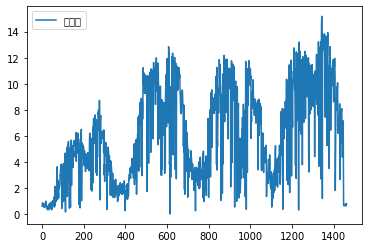

In [7]:
tp = pd.DataFrame()
tp['광진구'] = pred
pd.concat([train,tp]).reset_index().drop('index',axis=1).plot()